In [2]:
!pip install graphviz

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


### let's first test graphviz on example instance

In [24]:
from graphviz import Graph, Digraph


In [25]:
myColorPalette = ["#d82014", "#dfd116", "#abe318", "#69eea8", "#ace764", "#cdc592", "#0e29db", "#8d3ccd", "#d96f7c", "#49346a"]

In [26]:
# Create Digraph object
dot = Digraph()

In [27]:
# Add nodes 1 and 2
dot.node('1', fillcolor=myColorPalette[0], style="filled")
dot.node('2')

# Add edge between 1 and 2
dot.edges(['12'])

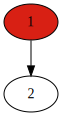

In [28]:
dot

# Coloring graph problem

reminder: Graph coloring problem is to assign colors to certain elements of a graph subject to certain constraints. Vertex coloring is the most common graph coloring problem. The problem is, given m colors, find a way of coloring the vertices of a graph such that no two adjacent vertices are colored using same color.

In [120]:
import random

def generateRandomGraph(n, p, withRandomColor = False):
    """
        Function inspired by the Algo1 course given by nicolas Lehir: nicolaslehir@gmail.com
        
        Function used to generate a random undirected graph.

        :param n: number of nodes in the graph
        :param p: number of edges in the graph

        Libraries used :
        ----------------
        networkx
        matplotlib

    """
    if p > n * (n - 1) / 2:
        raise ValueError('The number of edges is too large !')
    
    dot = Graph()
    # in an undirected graph, we dont need to consider the inverse of an edge
    all_edges = [{i, j} for i in range(1, n + 1) for j in range(i + 1, n + 1)]
    # remove edges from one node to itself
    all_edges = [edge for edge in all_edges if len(edge) == 2]

    # shuffle the order of the edges
    random.shuffle(all_edges)

    # double check that we did not make an error while creating our set of edges
    if len(all_edges) == n * (n - 1) / 2:
        print(f"There is n(n-1)/2= {int((n * (n - 1))/2)} edges possible")
    
    nodes = [i for i in range(1, n + 1)]
    edges = []
    for j in range(p - 1):
        random_edge = all_edges.pop()
        node_a = random_edge.pop()
        node_b = random_edge.pop()
        edges.append((node_a, node_b))
        
    colors = []
    if withRandomColor == True:
        for i in range(n):
            colors.append(random.randint(0, len(myColorPalette) - 1))
    
    return (nodes, edges, colors)

randomGraph = generateRandomGraph(10, 20, True)
randomGraph

There is n(n-1)/2= 45 edges possible


([1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [(8, 9),
  (10, 4),
  (2, 6),
  (9, 10),
  (1, 7),
  (8, 10),
  (9, 5),
  (1, 6),
  (3, 6),
  (2, 4),
  (1, 4),
  (4, 6),
  (2, 3),
  (3, 4),
  (9, 4),
  (1, 2),
  (3, 7),
  (10, 3),
  (10, 7)],
 [7, 9, 8, 8, 9, 2, 7, 7, 8, 8])

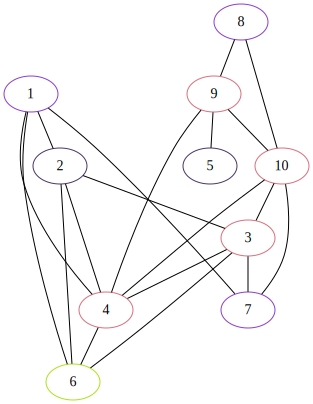

In [121]:
def transformGraphToDot(nodes, edges, colors=[], fileName=None):
    dot = Graph()
    
    for i in range(len(nodes)):
        if i < len(colors):
            dot.node(str(nodes[i]), color = myColorPalette[colors[i]])
        else:
            dot.node(str(nodes[i]))
    for node in nodes:
        dot.node(str(node))
    
    for a, b in edges:
        dot.edge(str(a), str(b))
    
    if fileName != None:
        # visualize the graph
        graph_name = 'graphs/' + fileName
        dot.render(graph_name)
    
    return dot

dot = transformGraphToDot(randomGraph[0], randomGraph[1], randomGraph[2])
dot

In [122]:
randomGraph = generateRandomGraph(15, 30)

There is n(n-1)/2= 105 edges possible


# Solving Algorithm
## Greedy algorithm
Let's implement a greedy algorithm with a very simple heuristic: just take a color that is not already taken by the neighbours

number of colors in the graph: 3


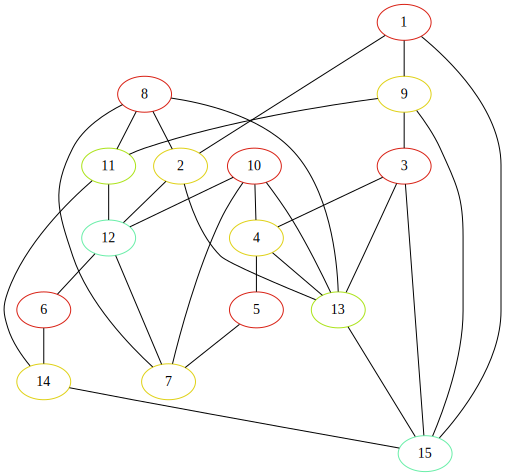

In [123]:
def greedyColoring(nodes, edges):
    colors = []
    
    # fill colors to None at the beginning
    for i in range(len(nodes)):
        colors.append(None)
    
    # for each node
    for i in range(len(nodes)):
        # get the neighbours
        colorNeighbour = [colors[item[1] - 1] for item in edges if nodes[i] == item[0]] + [colors[item[0] - 1] for item in edges if nodes[i] == item[1]]
        
        # print the neighbours
        #print(f"node: {nodes[i]} : {colorNeighbour}")
        
        # for each colors of the colorPalette
        for j in range(len(myColorPalette)):
            
            # if the color is not already in use by any neighbour
            if j not in colorNeighbour:
                colors[i] = j
                # the color has been set, we pass to the next node
                break
            # here is the else part, continue...

    return (colors)

colors = greedyColoring(randomGraph[0], randomGraph[1])
print(f"number of colors in the graph: {max(colors)}")
dot = transformGraphToDot(randomGraph[0], randomGraph[1], colors, fileName = "randomColoring")
dot

In [142]:
randomGraph = generateRandomGraph(15, 30)
colors = greedyColoring(randomGraph[0], randomGraph[1])
print(f"number of colors in the graph: {max(colors) + 1}; for a 15:30 graph")
dot = transformGraphToDot(randomGraph[0], randomGraph[1], colors, fileName = "coloring-15-30")

randomGraph = generateRandomGraph(150, 300)
colors = greedyColoring(randomGraph[0], randomGraph[1])
print(f"number of colors in the graph: {max(colors) + 1}; for a 150:300 graph")
dot = transformGraphToDot(randomGraph[0], randomGraph[1], colors, fileName = "coloring-150-300")

randomGraph = generateRandomGraph(75, 200)
colors = greedyColoring(randomGraph[0], randomGraph[1])
print(f"number of colors in the graph: {max(colors) + 1}; for a 75:200 graph")
dot = transformGraphToDot(randomGraph[0], randomGraph[1], colors, fileName = "coloring-75-200")

randomGraph = generateRandomGraph(500, 2000)
colors = greedyColoring(randomGraph[0], randomGraph[1])
print(f"number of colors in the graph: {max(colors) + 1}; for a 500:2000 graph")
dot = transformGraphToDot(randomGraph[0], randomGraph[1], colors, fileName = "coloring-500-2000")

There is n(n-1)/2= 105 edges possible
number of colors in the graph: 4; for a 15:30 graph
There is n(n-1)/2= 11175 edges possible
number of colors in the graph: 5; for a 150:300 graph
There is n(n-1)/2= 2775 edges possible
number of colors in the graph: 5; for a 75:200 graph
There is n(n-1)/2= 124750 edges possible
number of colors in the graph: 7; for a 500:2000 graph


## Analysis
This greedy algorithm is fairly simple, and has a O complexity of O(e*n) (edges * nodes) because we go through all the edges at every nodes. (Here the iteration through the colors is negligible because the number of colors is constant) This complexity could be optimized by several ways:
- Not to iterate through all edges at each node by keeping track of whom is neighbour of whom
- Explore the neighbours of the current node may exclude the iteration of all the colors by keeping in memory the currently used colors

This is a greedy algorithm, so the result may not be minimal.